# Set up:

In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/NLP project /data')

# Libraries:

In [3]:
import pandas as pd
import plotly.express as px
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# Sentimental Analysis:

In [4]:
df = pd.read_csv('cleaned_tweets.csv')
df.head(5)

,date,tweet_id,text,user_name,reply_count,retweet_count,like_count,language
0,2023-01-15 16:19:28,1614658536038105088,hate crime needs charged suchstories like nati...,speedkitty,0,0,0,en
1,2023-01-15 15:52:49,1614651830130118659,horrifying paly grew bloomington amp large num...,ellen_adair,0,0,8,en
2,2023-01-15 15:32:53,1614646811352002560,another prime example media using antiasian am...,AllLeahWrote,1,0,11,en
3,2023-01-15 14:38:58,1614633243533545473,according cou documents white woman told polic...,queenkv,0,0,2,en
4,2023-01-15 10:09:35,1614565451274809349,msm quiet asian hate billie davis 56 admitted ...,FirstThemNEWS,7,50,78,en


## TextBlob:

- `polarity`: [-1,1] indicating the intensity of a Tweet. (-1: negative sentiment, 1: positive sentiment).
- `subjectivity`: [0,1] referring to degrees of personal opinions and judgments. The higher score indicates that the Tweet is more about personal opinions than factual info.

In [5]:
df[['polarity', 'subjectivity']] = df['text'].apply(lambda x: pd.Series(TextBlob(x).sentiment))

In [6]:
df.head(10)

,date,tweet_id,text,user_name,reply_count,retweet_count,like_count,language,polarity,subjectivity
0,2023-01-15 16:19:28,1614658536038105088,hate crime needs charged suchstories like nati...,speedkitty,0,0,0,en,-0.800000,0.900000
1,2023-01-15 15:52:49,1614651830130118659,horrifying paly grew bloomington amp large num...,ellen_adair,0,0,8,en,-0.366143,0.542714
2,2023-01-15 15:32:53,1614646811352002560,another prime example media using antiasian am...,AllLeahWrote,1,0,11,en,-0.050000,0.800000
3,2023-01-15 14:38:58,1614633243533545473,according cou documents white woman told polic...,queenkv,0,0,2,en,-0.041667,0.016667
4,2023-01-15 10:09:35,1614565451274809349,msm quiet asian hate billie davis 56 admitted ...,FirstThemNEWS,7,50,78,en,-0.233333,0.366667
5,2023-01-15 06:11:32,1614505546257960961,thank sharing lest think antiasian hate decrea...,dorisfchang,0,0,0,en,-0.650000,0.950000
6,2023-01-15 05:00:00,1614487542769795073,hate asian american pacific islander aapi popu...,Respond2Racism,0,0,1,en,-0.400000,0.450000
7,2023-01-15 04:02:16,1614473015227547649,stories media afraid discuss cover ask represe...,AsianSocialNet,0,1,2,en,-0.600000,0.900000
8,2023-01-15 00:54:43,1614425814560567296,thanks hosting screening inspiring look linsan...,PhilTing,1,1,4,en,0.209524,0.447619
9,2023-01-15 00:23:59,1614418082230931457,good night tweeps getvaccinated getboosted sta...,kitchen5203,0,0,0,en,0.700000,0.600000


In [7]:
fig = px.scatter(df, x='polarity',y='subjectivity',
                 title = 'Sentimental Analysis',
                 labels = {'polarity':'Polarity', 
                           'subjectivity':'Subjectivity'})

fig.show()

In [8]:
def get_sentiment(score):
    if score > 0: 
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else: 
        return 'Neutral'

In [9]:
df['sentiment'] = df['polarity'].apply(get_sentiment)

In [10]:
df.head(5)

,date,tweet_id,text,user_name,reply_count,retweet_count,like_count,language,polarity,subjectivity,sentiment
0,2023-01-15 16:19:28,1614658536038105088,hate crime needs charged suchstories like nati...,speedkitty,0,0,0,en,-0.800000,0.900000,Negative
1,2023-01-15 15:52:49,1614651830130118659,horrifying paly grew bloomington amp large num...,ellen_adair,0,0,8,en,-0.366143,0.542714,Negative
2,2023-01-15 15:32:53,1614646811352002560,another prime example media using antiasian am...,AllLeahWrote,1,0,11,en,-0.050000,0.800000,Negative
3,2023-01-15 14:38:58,1614633243533545473,according cou documents white woman told polic...,queenkv,0,0,2,en,-0.041667,0.016667,Negative
4,2023-01-15 10:09:35,1614565451274809349,msm quiet asian hate billie davis 56 admitted ...,FirstThemNEWS,7,50,78,en,-0.233333,0.366667,Negative


In [11]:
neg_df = df[df['sentiment']=='Negative']
neg_df.head(5)

,date,tweet_id,text,user_name,reply_count,retweet_count,like_count,language,polarity,subjectivity,sentiment
0,2023-01-15 16:19:28,1614658536038105088,hate crime needs charged suchstories like nati...,speedkitty,0,0,0,en,-0.800000,0.900000,Negative
1,2023-01-15 15:52:49,1614651830130118659,horrifying paly grew bloomington amp large num...,ellen_adair,0,0,8,en,-0.366143,0.542714,Negative
2,2023-01-15 15:32:53,1614646811352002560,another prime example media using antiasian am...,AllLeahWrote,1,0,11,en,-0.050000,0.800000,Negative
3,2023-01-15 14:38:58,1614633243533545473,according cou documents white woman told polic...,queenkv,0,0,2,en,-0.041667,0.016667,Negative
4,2023-01-15 10:09:35,1614565451274809349,msm quiet asian hate billie davis 56 admitted ...,FirstThemNEWS,7,50,78,en,-0.233333,0.366667,Negative


In [12]:
pos_df = df[df['sentiment']=='Positive']
pos_df.head(5)

,date,tweet_id,text,user_name,reply_count,retweet_count,like_count,language,polarity,subjectivity,sentiment
8,2023-01-15 00:54:43,1614425814560567296,thanks hosting screening inspiring look linsan...,PhilTing,1,1,4,en,0.209524,0.447619,Positive
9,2023-01-15 00:23:59,1614418082230931457,good night tweeps getvaccinated getboosted sta...,kitchen5203,0,0,0,en,0.700000,0.600000,Positive
10,2023-01-14 22:23:18,1614387709342265344,golden globes became chinesevirus super spread...,LealandBruce2,0,0,0,en,0.316667,0.583333,Positive
13,2023-01-14 19:36:40,1614345773512282112,chinas intentions good chinesevirus,Arunavg822,0,0,0,en,0.700000,0.600000,Positive
14,2023-01-14 19:33:25,1614344955413278722,communityowned assets amp creativity key us so...,LexLeifheit,2,1,1,en,0.050000,0.441667,Positive


In [24]:
neu_df = df[df['sentiment']=='Neutral']
neu_df.head(5)

,date,tweet_id,text,user_name,reply_count,retweet_count,like_count,language,polarity,subjectivity,sentiment
11,2023-01-14 21:36:06,1614375830171561984,vaccine kill people covid19 coronavirus chines...,AhHunnetMiLL,1,0,0,en,0.0,0.0,Neutral
12,2023-01-14 19:55:05,1614350410004791301,stopracism stopaapihate woman stabbed teen mul...,qzeng,0,0,0,en,0.0,0.0,Neutral
24,2023-01-14 03:18:02,1614099493821222916,understand chinesevirus climatecrisis fossilfuels,harshkkapoor,0,3,4,en,0.0,0.0,Neutral
26,2023-01-13 23:15:46,1614038526152306688,heas break amp stand solidarity stopaapihate,profshrutirana,0,9,25,en,0.0,0.0,Neutral
31,2023-01-13 15:24:23,1613919899209940993,keep worlds mind covid spread china sends 3 sa...,vigmukesh,0,0,0,en,0.0,0.0,Neutral


In [13]:
print("Number of positive tweets:", pos_df.shape[0])

Number of positive tweets: 3549


In [14]:
print("Number of negative tweets:", neg_df.shape[0])

Number of negative tweets: 3770


In [26]:
print("Number of neutral tweets:", neu_df.shape[0])

Number of neutral tweets: 3699


In [33]:
fig = px.histogram(df, x='sentiment', color = 'sentiment')
fig.show()

## Word Cloud:

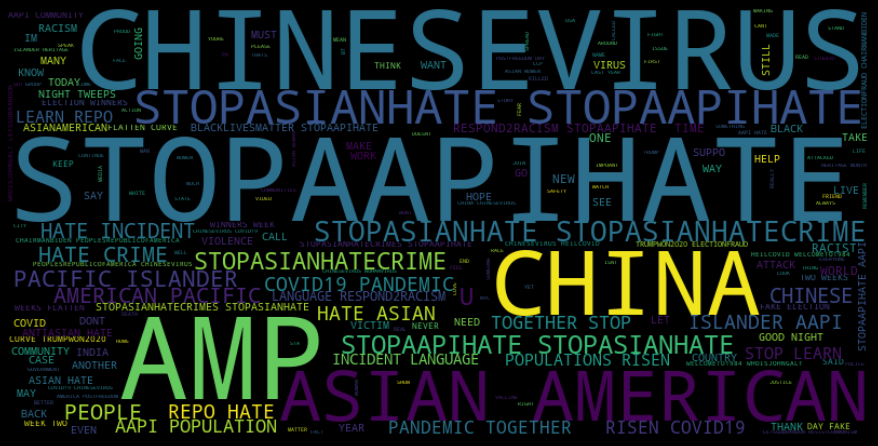

In [15]:
# all tweets 
all = ' '.join([w for w in df['text']])
wordcloud = WordCloud(width=800, height=400).generate(all.upper())

plt.figure(figsize=[12,8], facecolor='k')
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

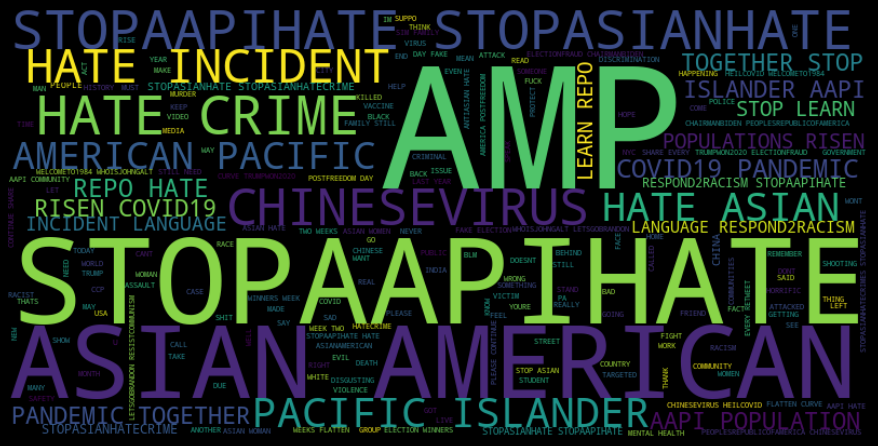

In [16]:
# negative tweets 
neg = ' '.join([w for w in neg_df['text']])
wordcloud = WordCloud(width=800, height=400).generate(neg.upper())

plt.figure(figsize=[12,8], facecolor='k')
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

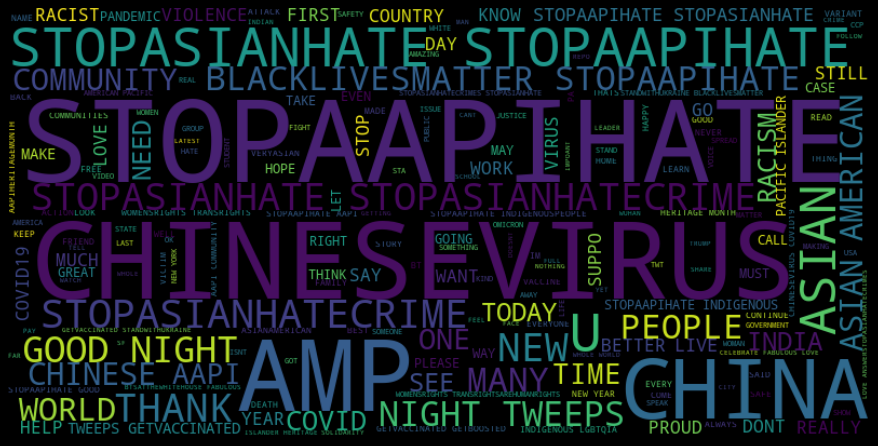

In [17]:
# positive tweets 
pos = ' '.join([w for w in pos_df['text']])
wordcloud = WordCloud(width=800, height=400).generate(pos.upper())

plt.figure(figsize=[12,8], facecolor='k')
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

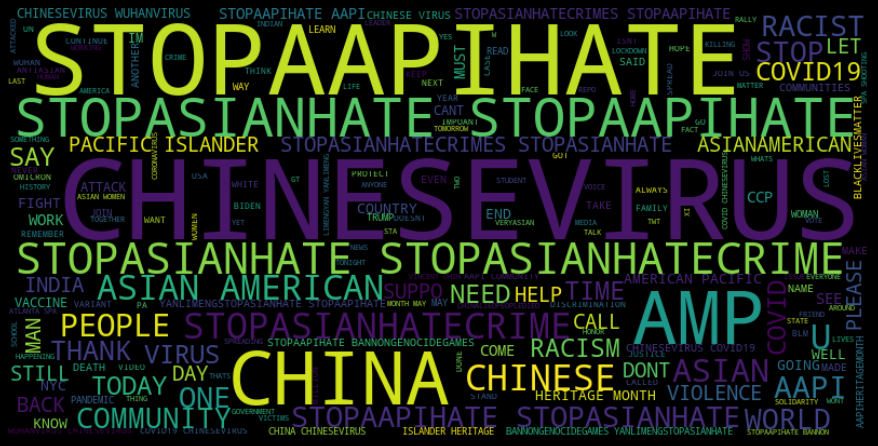

In [27]:
# neutral tweets 
neu = ' '.join([w for w in neu_df['text']])
wordcloud = WordCloud(width=800, height=400).generate(neu.upper())

plt.figure(figsize=[12,8], facecolor='k')
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Percentage:

## Positive Tweets:

In [22]:
print('Percentage of positive tweets = ', round(float((pos_df.shape[0]/df.shape[0])*100),2), '%')

Percentage of positive tweets =  32.21 %


## Negative Tweets:

In [23]:
print('Percentage of negative tweets = ', round(float((neg_df.shape[0]/df.shape[0])*100),2), '%')

Percentage of negative tweets =  34.22 %


## Neutral Tweets:

In [28]:
print('Percentage of neutral tweets = ', round(float((neu_df.shape[0]/df.shape[0])*100),2), '%')

Percentage of neutral tweets =  33.57 %
